## Simple Linear Regression

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df=pd.read_csv('height-weight.csv')

In [36]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

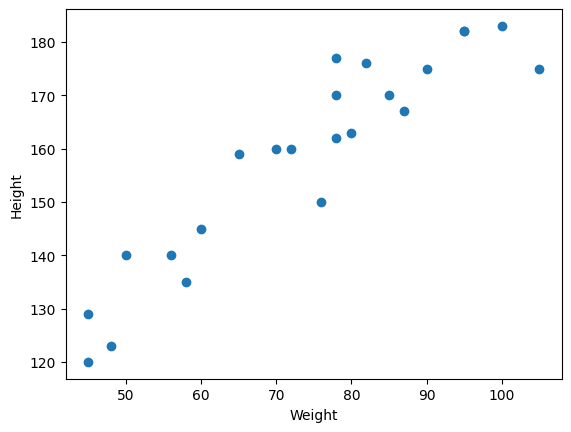

In [37]:
## Scatter Plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [38]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


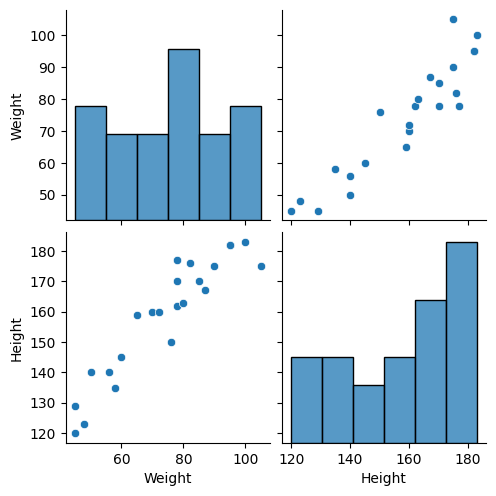

In [39]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [40]:
## Independent and dependent features
X=df[['Weight']]
y=df['Height']


In [41]:
X_series= df['Weight']
np.array(X_series).shape

(23,)

In [42]:
np.array(y).shape

(23,)

In [43]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)

In [44]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)


In [46]:
X_test=scaler.transform(X_test)

In [47]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [ ]:
## Applying Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [49]:
regression = LinearRegression(n_jobs=-1)

In [50]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [51]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


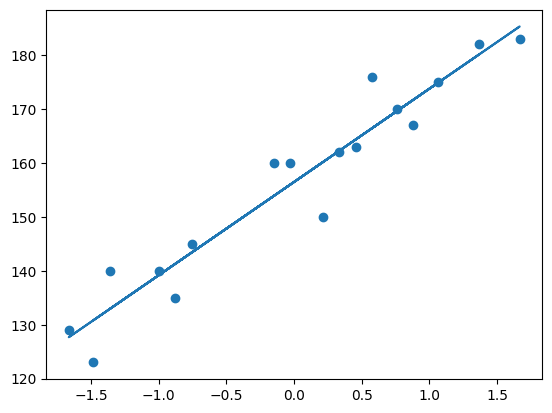

In [52]:
## Plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(
    X_train,
    regression.predict(X_train)
)

### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =156.470 + 17.29(X_test)

In [53]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [55]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [56]:
## Performance Metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [57]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


## R square

In [58]:
from sklearn.metrics import r2_score


In [59]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

In [60]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [65]:
!pip install statsmodels

  Using cached statsmodels-0.14.6-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
Using cached statsmodels-0.14.6-cp313-cp313-win_amd64.whl (9.5 MB)
Using cached patsy-1.0.2-py2.py3-none-any.whl (233 kB)

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- -------------

In [66]:
## OLSLinear Regression
import statsmodels.api as sm

In [67]:
model=sm.OLS(y_train,X_train).fit()

In [70]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [71]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 22 Jan 2026   Prob (F-statistic):                       0.664
Time:                        10:37:35   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\VIJAY\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)
